## Prediction using Supervised ML

In [23]:
%matplotlib inline

In [48]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from math import sqrt

In [25]:
df = pd.read_csv("http://bit.ly/w-data")

In [55]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


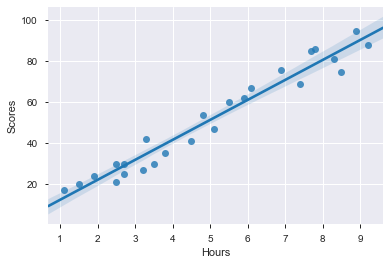

In [27]:
sns.regplot(x="Hours", y="Scores", data=df)
plt.show()

In [28]:
profile = ProfileReport(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [29]:
profile.to_file("profiling.html")

In [44]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
rms = sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rms)

4.352380006653288


In [51]:
r2 = metrics.r2_score(y_test, y_pred)   
n = len(X_test)
p = len(X_test[0])
adjusted_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))

print(adjusted_r2)

0.9570740726890659


In [53]:
print("If study hour is 9.5, score is:", model.predict([[9.5]]))

If study hour is 9.5, score is: [94.80663482]
